In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Database = pd.read_csv("energydata_complete.csv")

In [3]:
Database.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
Database.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [5]:
Database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
Database.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
Database.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
column_names = {"T1":"Temp_kitchen_area", "RH_1":"Humidity_kitchen_area", "T2":"Temp_room_area", "RH_2":"Humidity_room_area", 
                "T3":"Temp_laundry_area", "RH_3":"Humidity_laundry_area", "T4":"Temp_office_area", "RH_4":"Humidity_office_area",
               "T5":"Temp_bathroom", "RH_5":"Humidity_bathroom", "T6":"Temp_outside", "RH_6":"Humidity_outside",
               "T7":"Temp_ironing_area", "RH_7":"Humidity_ironing_area", "T8":"Temp_teen_room", "RH_8":"Humidity_teen_room",
               "T9":"Temp_parent_room", "RH_9":"Humidity_parent_room", "T_out":"Temp_outside", "RH_out":"Humidity_outside",
               "rv1":"Random_var1", "rv2":"Random_var2"}

In [9]:
Database = Database.rename(columns=column_names)

In [10]:
Database.columns

Index(['date', 'Appliances', 'lights', 'Temp_kitchen_area',
       'Humidity_kitchen_area', 'Temp_room_area', 'Humidity_room_area',
       'Temp_laundry_area', 'Humidity_laundry_area', 'Temp_office_area',
       'Humidity_office_area', 'Temp_bathroom', 'Humidity_bathroom',
       'Temp_outside', 'Humidity_outside', 'Temp_ironing_area',
       'Humidity_ironing_area', 'Temp_teen_room', 'Humidity_teen_room',
       'Temp_parent_room', 'Humidity_parent_room', 'Temp_outside',
       'Press_mm_hg', 'Humidity_outside', 'Windspeed', 'Visibility',
       'Tdewpoint', 'Random_var1', 'Random_var2'],
      dtype='object')

In [11]:
Database.head()

,date,Appliances,lights,Temp_kitchen_area,Humidity_kitchen_area,Temp_room_area,Humidity_room_area,Temp_laundry_area,Humidity_laundry_area,Temp_office_area,...,Temp_parent_room,Humidity_parent_room,Temp_outside,Press_mm_hg,Humidity_outside,Windspeed,Visibility,Tdewpoint,Random_var1,Random_var2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [12]:
Database.nunique()

date                     19735
Appliances                  92
lights                       8
Temp_kitchen_area          722
Humidity_kitchen_area     2547
Temp_room_area            1650
Humidity_room_area        3376
Temp_laundry_area         1426
Humidity_laundry_area     2618
Temp_office_area          1390
Humidity_office_area      2987
Temp_bathroom             2263
Humidity_bathroom         7571
Temp_outside              4446
Humidity_outside          9709
Temp_ironing_area         1955
Humidity_ironing_area     5891
Temp_teen_room            2228
Humidity_teen_room        6649
Temp_parent_room           924
Humidity_parent_room      3388
Temp_outside              1730
Press_mm_hg               2189
Humidity_outside           566
Windspeed                  189
Visibility                 413
Tdewpoint                 1409
Random_var1              19735
Random_var2              19735
dtype: int64

In [13]:
Data_drop =Database.drop(["date", "lights"], axis=1)

In [14]:
data_corr = Database.corr()

<AxesSubplot:>

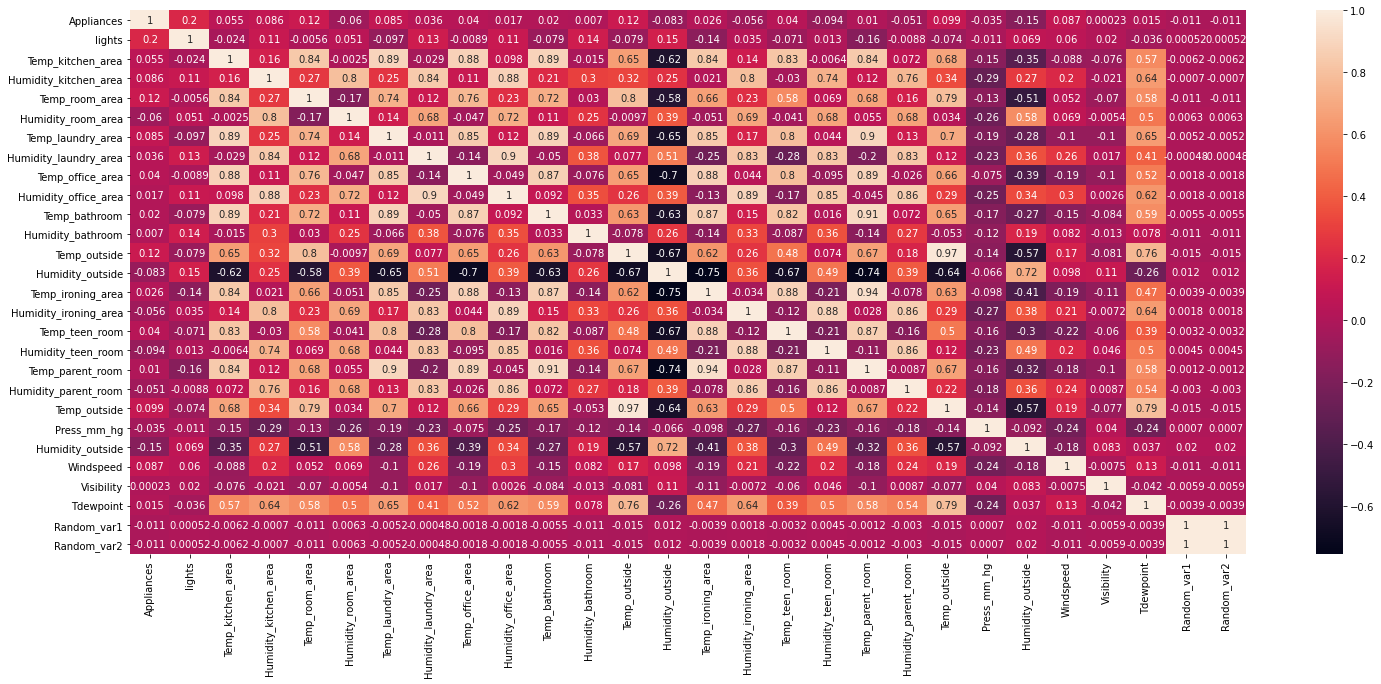

In [15]:
plt.figure(figsize=(25,10))
sns.heatmap(data_corr, annot=True)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_Data_drop = pd.DataFrame(scaler.fit_transform(Data_drop), columns=Data_drop.columns)
features_Data_drop = normalised_Data_drop[['Temp_room_area']]
Appl_target = normalised_Data_drop['Temp_outside']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_Data_drop, Appl_target,test_size=0.3, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [25]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 

0.64

In [61]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 

0.08

In [62]:
# Residual Sum of Squares (RSS) 
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 

Temp_outside    66.34
Temp_outside    63.70
dtype: float64

In [28]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.105

In [55]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
predictions =ridge_reg.predict(x_test)
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3) 

0.105

In [56]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
predicted_values =lasso_reg.predict(x_test)
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.105

In [57]:
# What is the Coefficient of Determination (in two decimal places)?
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predicted_values)
round(r2,2)

0.64

In [59]:
predicted_lasso = lasso_reg.predict(x_test)

In [60]:
# What is the new RMSE with the Lasso Regression (in 3 decimal places)?
rmse = np.sqrt(mean_squared_error(y_test,predicted_lasso))
round(rmse, 3)

0.105

In [63]:
new_features =normalised_Data_drop.drop('Appliances', axis=1)
target = normalised_Data_drop['Appliances']

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_features, target,test_size=0.3, random_state=42)

In [71]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
print(new_features.columns)
print("\n")
print(linear_model.coef_)

Index(['Temp_kitchen_area', 'Humidity_kitchen_area', 'Temp_room_area',
       'Humidity_room_area', 'Temp_laundry_area', 'Humidity_laundry_area',
       'Temp_office_area', 'Humidity_office_area', 'Temp_bathroom',
       'Humidity_bathroom', 'Temp_outside', 'Humidity_outside',
       'Temp_ironing_area', 'Humidity_ironing_area', 'Temp_teen_room',
       'Humidity_teen_room', 'Temp_parent_room', 'Humidity_parent_room',
       'Temp_outside', 'Press_mm_hg', 'Humidity_outside', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Random_var1', 'Random_var2'],
      dtype='object')


[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [69]:
#from sklearn.linear_model import Lasso
#lasso_reg = Lasso(alpha=0.001)
#lasso_reg.fit(x_train, y_train)
#predictions =lasso_reg.predict(x_test)
#Root Mean Square Error (RMSE)
x = new_features
y = target
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error
predictions = lasso.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)

0.094

In [72]:
#Which of these is not an assumption of Linear Regression?
# Heteroscedasticity

#In the different terms of the bias-variance tradeoff, which of the following is substantially more harmful to the test error than the training error?
#bias

#Ridge regression:
#reduces variance at the expense of higher bias.
    
#Cross Validation
# is guaranteed to prevent overfitting

#In linear regression, L2 regularization is equivalent to imposing a:
# Gaussian prior

#What can you use to find the best fit line for data in Linear Regression
#least square error

#Which of the following sentence is true about outliers in Linear Regression:
#Linear regression is sensitive to outliers

#How many coefficients do you need to estimate a simple linear regression model (One independent variable)?
#2

#A best fit line relating X and Y has a R-Squared value of 0.75. How do I interpret this information?
#75% of the variance in Y is explained by X

#The Lasso can be interpreted as least-squares linear regression where
#weights are regularized with the l1 norm

#Adding more basis functions in a linear model
#Decrease Model Bias
